In [46]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [47]:

result = pd.read_csv('result_grid.csv')

In [48]:
result[['city','country']] =result['place'].str.split(',',expand=True)
result["city"]= result["city"].replace('Copenhagen Municipality', "Copenhagen") 
result

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country
0,"Bern, Switzerland",40.590198,88.809785,1.847390,19.857961,8.0,77530.0,0.0,Bern,Switzerland
1,"Bordeaux, France",35.175573,87.585899,2.519168,14.619763,11.0,100340.0,2.0,Bordeaux,France
2,"Bremen, Germany",36.293220,79.049531,14.773379,18.664837,3.0,8299.0,1.0,Bremen,Germany
3,"Utrecht, Netherlands",42.903168,84.252566,1.847390,13.658381,10.0,100415.0,1.0,Utrecht,Netherlands
4,"Strasbourg, France",33.602624,81.579652,1.154618,13.944355,9.0,86074.0,2.0,Strasbourg,France
5,"Amsterdam, Netherlands",38.203497,91.526104,2.052655,13.688857,13.0,110154.0,2.0,Amsterdam,Netherlands
6,"Copenhagen Municipality,Denmark",43.197517,81.820616,1.679445,19.341072,8.0,112659.0,0.0,Copenhagen,Denmark
7,"Hamburg, Germany",43.678938,81.120036,4.105310,17.796932,36.0,341532.0,0.0,Hamburg,Germany
8,"Innsbruck, Austria",32.568249,78.514056,1.847390,14.142871,11.0,113014.0,0.0,Innsbruck,Austria
9,"Hannover, Germany",39.169952,83.534137,1.026328,17.292224,14.0,122193.0,0.0,Hannover,Germany


In [49]:
coya =pd.read_csv('coya.csv')
coya

,Unnamed: 0,city,country,total_score,bike_infrastructure,bike_use_percent,road_quality
0,0,Utrecht,Netherlands,77.84,57.51,51.0,60.78
1,1,Munster,Germany,65.93,51.23,39.1,53.05
2,2,Antwerp,Belgium,60.51,34.28,28.9,53.37
3,3,Copenhagen,Denmark,60.46,55.23,29.0,61.60
4,4,Amsterdam,Netherlands,60.24,55.90,32.0,61.71
5,5,Malmo,Sweden,55.88,46.55,30.0,52.40
6,6,Hangzhou,China,52.55,32.72,30.0,35.06
7,7,Bern,Switzerland,48.76,65.10,15.0,65.46
8,8,Bremen,Germany,47.81,59.78,21.0,55.96
9,9,Hannover,Germany,46.70,53.68,19.0,51.51


In [104]:
df = result.merge(coya, on="city", how = 'inner')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop_duplicates(subset=None, inplace=True)
df

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country_x,country_y,total_score,bike_infrastructure,bike_use_percent,road_quality
0,"Bern, Switzerland",40.590198,88.809785,1.847390,19.857961,8.0,77530.0,0.0,Bern,Switzerland,Switzerland,48.76,65.10,15.0,65.46
1,"Bordeaux, France",35.175573,87.585899,2.519168,14.619763,11.0,100340.0,2.0,Bordeaux,France,France,45.42,60.23,10.0,59.40
2,"Bremen, Germany",36.293220,79.049531,14.773379,18.664837,3.0,8299.0,1.0,Bremen,Germany,Germany,47.81,59.78,21.0,55.96
3,"Utrecht, Netherlands",42.903168,84.252566,1.847390,13.658381,10.0,100415.0,1.0,Utrecht,Netherlands,Netherlands,77.84,57.51,51.0,60.78
4,"Strasbourg, France",33.602624,81.579652,1.154618,13.944355,9.0,86074.0,2.0,Strasbourg,France,France,45.45,56.44,16.0,58.82
5,"Amsterdam, Netherlands",38.203497,91.526104,2.052655,13.688857,13.0,110154.0,2.0,Amsterdam,Netherlands,Netherlands,60.24,55.90,32.0,61.71
6,"Copenhagen Municipality,Denmark",43.197517,81.820616,1.679445,19.341072,8.0,112659.0,0.0,Copenhagen,Denmark,Denmark,60.46,55.23,29.0,61.60
7,"Hamburg, Germany",43.678938,81.120036,4.105310,17.796932,36.0,341532.0,0.0,Hamburg,Germany,Germany,44.97,55.10,15.0,54.90
8,"Innsbruck, Austria",32.568249,78.514056,1.847390,14.142871,11.0,113014.0,0.0,Innsbruck,Austria,Austria,43.12,53.81,17.0,56.18
9,"Hannover, Germany",39.169952,83.534137,1.026328,17.292224,14.0,122193.0,0.0,Hannover,Germany,Germany,46.70,53.68,19.0,51.51


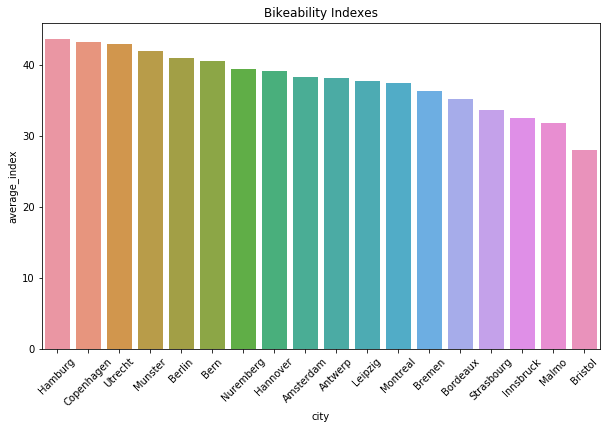

In [112]:
import seaborn as sns
plt.figure(figsize=(10,6))
# make barplot and sort bars
chart =sns.barplot(x='city', y="average_index", data=df, 
            order=df.sort_values('average_index', ascending= False).city)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Bikeability Indexes')
plt.show()


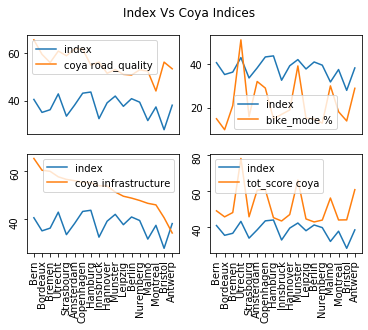

In [108]:
fig, ax = plt.subplots(2,2)
fig.suptitle('Index Vs Coya Indices')
ax[0,0].plot(df['city'], df['average_index'], label = 'index')
ax[0,0].plot(df['city'], df['road_quality'], label = 'coya road_quality')
ax[1,0].plot(df['city'], df['average_index'], label = 'index')
ax[1,0].plot(df['city'], df['bike_infrastructure'], label = 'coya infrastructure')
ax[1,0].legend(loc = 'top right')
ax[0,0].legend(loc = 'top right')
ax[0,0].get_xaxis().set_ticks([])
ax[1,0].tick_params(labelrotation=90)

ax[1,1].plot(df['city'], df['average_index'], label = 'index')
ax[1,1].plot(df['city'], df['total_score'], label = 'tot_score coya')
ax[0,1].plot(df['city'], df['average_index'], label = 'index')
ax[0,1].plot(df['city'], df['bike_use_percent'], label = 'bike_mode %')
ax[1,1].tick_params(labelrotation=90)
ax[0,1].get_xaxis().set_ticks([])
ax[0,1].legend(loc = 'top right')
ax[1,1].legend(loc = 'top right')


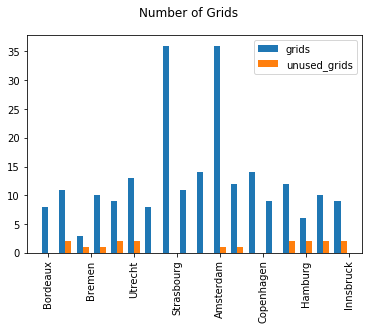

In [107]:
import numpy as np
x = np.arange(len(df))
width = 0.35
fig, ax = plt.subplots()
fig.suptitle('Number of Grids')
ax1 = ax.bar(x - width/2, df['grids'], width, label='grids')
ax2 = ax.bar(x + width/2, df['unused_grids'], width, label='unused_grids')
ax.legend()
ax.set_xticklabels(df['city'], rotation = 90)
plt.show()